In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

In [76]:
df = pd.read_csv("Column_PBR-Minghao.csv",skiprows=1)
# df = df.iloc[1:42].reset_index(drop=True)

In [77]:
def convert_to_float(coord):
    coord = str(coord)
    coord = coord.replace("°", "").replace('"', '').strip()
    if 'N' in coord or 'E' in coord:
        return float(coord.replace('N', '').replace('E', '').strip())
    elif 'S' in coord or 'W' in coord:
        return -float(coord.replace('S', '').replace('W', '').strip())
    else:
        return float(coord.strip())

df['Latitude'] = df['Latitude'].apply(convert_to_float)
df['Longitude'] = df['Longitude'].apply(convert_to_float)

df.head()

,Microalgae Species,Year,Location,Latitude,Longitude,Diameter of the Reactor (m),Height of the Reactor (m),Flow Pattern,Reactor Volume (m3),Max Biomass Productivity (mg/L*day),Max Biomass Concentration (mg/L),Biomass Productivity (mg/L*day),Ref (in APA form)
0,Porphyridium sp.,1998,"Almería, Spain",36.8333,-2.45,0.096,2.00,internal loop airlift,0.012,552.000000,NaN,552.000000,"Merchuk, J. C., Contreras, A., Garcia, F., & M..."
1,Phaeodactylum tricornutum,1998,"Almería, Spain",36.8333,-2.45,0.09,2.00,internal loop airlift,0.012,480.000000,4000.0,360.000000,"Contreras, A., García, F., Molina, E., & Merch..."
2,Phaeodactylum tricornutum,2000,"Almería, Spain",36.8333,-2.45,0.193,2.03,split column airlift,0.060,369.230769,4000.0,369.230769,"Sánchez Mirón, A., García Camacho, F., Contrer..."
3,Chaetoceros calcitrans,2005,"Bangkok, Thailand",13.7300,100.52,0.15,0.96,bubble,0.017,614.400000,1536.0,614.400000,"Krichnavaruk, S., Loataweesup, W., Powtongsook..."
4,Chaetoceros calcitrans,2005,"Bangkok, Thailand",13.7300,100.52,0.15,0.96,internal loop airlift,0.017,710.400000,1776.0,710.400000,"Krichnavaruk, S., Loataweesup, W., Powtongsook..."


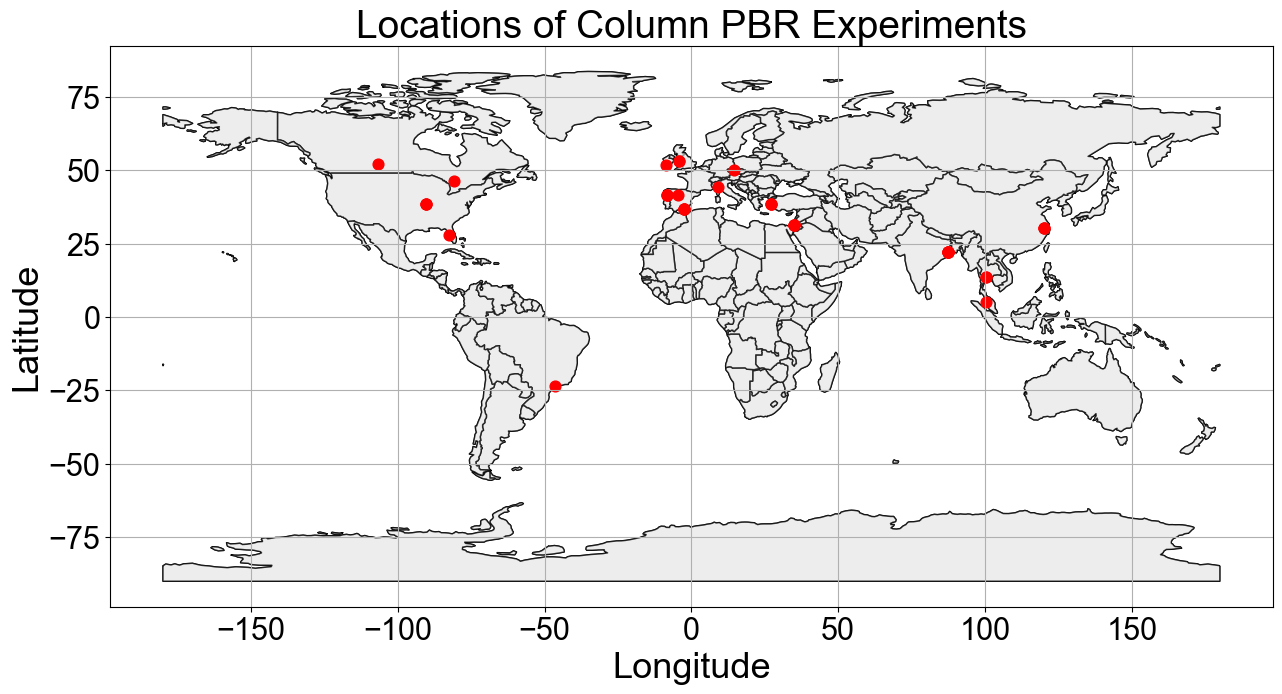

In [78]:
# Mapping

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# import shapefiles
countries = gpd.read_file('./110m_cultural/ne_110m_admin_0_countries.shp')
states_provinces = gpd.read_file('./110m_cultural/ne_110m_admin_1_states_provinces.shp')
tiny_countries = gpd.read_file('./110m_cultural/ne_110m_admin_0_tiny_countries.shp')
sovereignty = gpd.read_file('./110m_cultural/ne_110m_admin_0_sovereignty.shp')
map_units = gpd.read_file('./110m_cultural/ne_110m_admin_0_map_units.shp')

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

fig, ax = plt.subplots(figsize=(15, 10))

map_units.plot(ax=ax, color='lightgrey', edgecolor='black')
countries.plot(ax=ax, color='white', edgecolor='black', alpha=0.6)
# states_provinces.plot(ax=ax, color='none', edgecolor='blue', linewidth=0.5)
# tiny_countries.plot(ax=ax, color='black', edgecolor='black')
# sovereignty.plot(ax=ax, color='none', edgecolor='red', linewidth=0.5)


gdf.plot(ax=ax, marker='o', color='red', markersize=60)
plt.title('Locations of Column PBR Experiments',fontsize=28)
plt.xlabel('Longitude',fontsize=26)
plt.ylabel('Latitude',fontsize=26)
plt.grid(True)
plt.savefig('Locations of Column PBR Experiments.png', dpi=400, bbox_inches='tight')
plt.show()

/var/folders/qc/nfcbzrkx3s535cjt8xwl4jx80000gn/T/ipykernel_13432/4054373957.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Flow Pattern Category', y='Biomass Productivity (mg/L*day)', data=df, palette="Set2", linewidth=2.5)


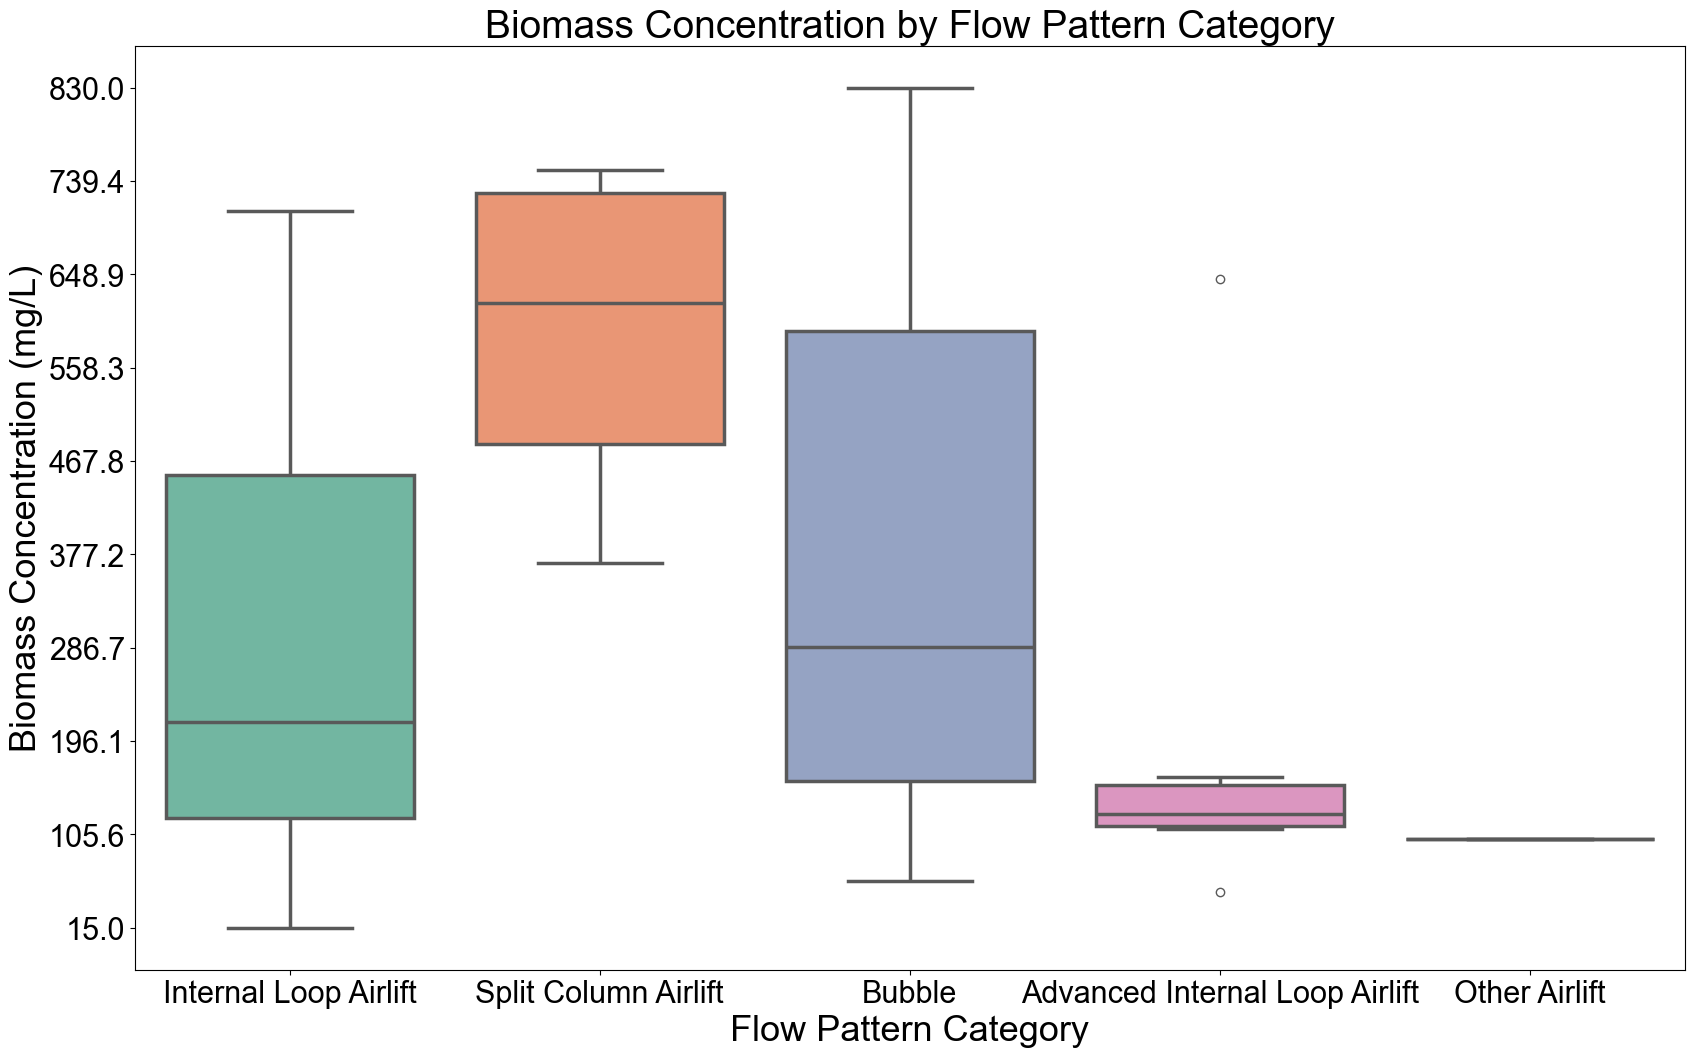

In [79]:
# Categorize the Flow Pattern
def categorize_flow_pattern(pattern):
    pattern = str(pattern).lower().strip()
    if 'bubble' in pattern:
        return 'Bubble'
    elif 'split column airlift' in pattern:
        return 'Split Column Airlift'
    elif 'internal loop airlift' in pattern:
        # Check if there are any additional words after "internal loop airlift"
        if len(pattern.split()) > 3:
            return 'Advanced Internal Loop Airlift'
        else:
            return 'Internal Loop Airlift'
    else:
        return 'Other Airlift'

df['Flow Pattern Category'] = df['Flow Pattern'].apply(categorize_flow_pattern)

df['Biomass Productivity (mg/L*day)'] = pd.to_numeric(df['Biomass Productivity (mg/L*day)'], errors='coerce')

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

# Plotting
plt.figure(figsize=(20, 12))
sns.boxplot(x='Flow Pattern Category', y='Biomass Productivity (mg/L*day)', data=df, palette="Set2", linewidth=2.5)
plt.title('Biomass Concentration by Flow Pattern Category', fontsize=28)
plt.xlabel('Flow Pattern Category', fontsize=26)
plt.ylabel('Biomass Concentration (mg/L)', fontsize=26)
plt.xticks(rotation=0)
plt.yticks(np.linspace(df['Biomass Productivity (mg/L*day)'].min(), df['Biomass Productivity (mg/L*day)'].max(), 10))
plt.savefig('Biomass Concentration by Flow Pattern Category.png', dpi=400, bbox_inches='tight')
# plt.grid(True)
plt.show()

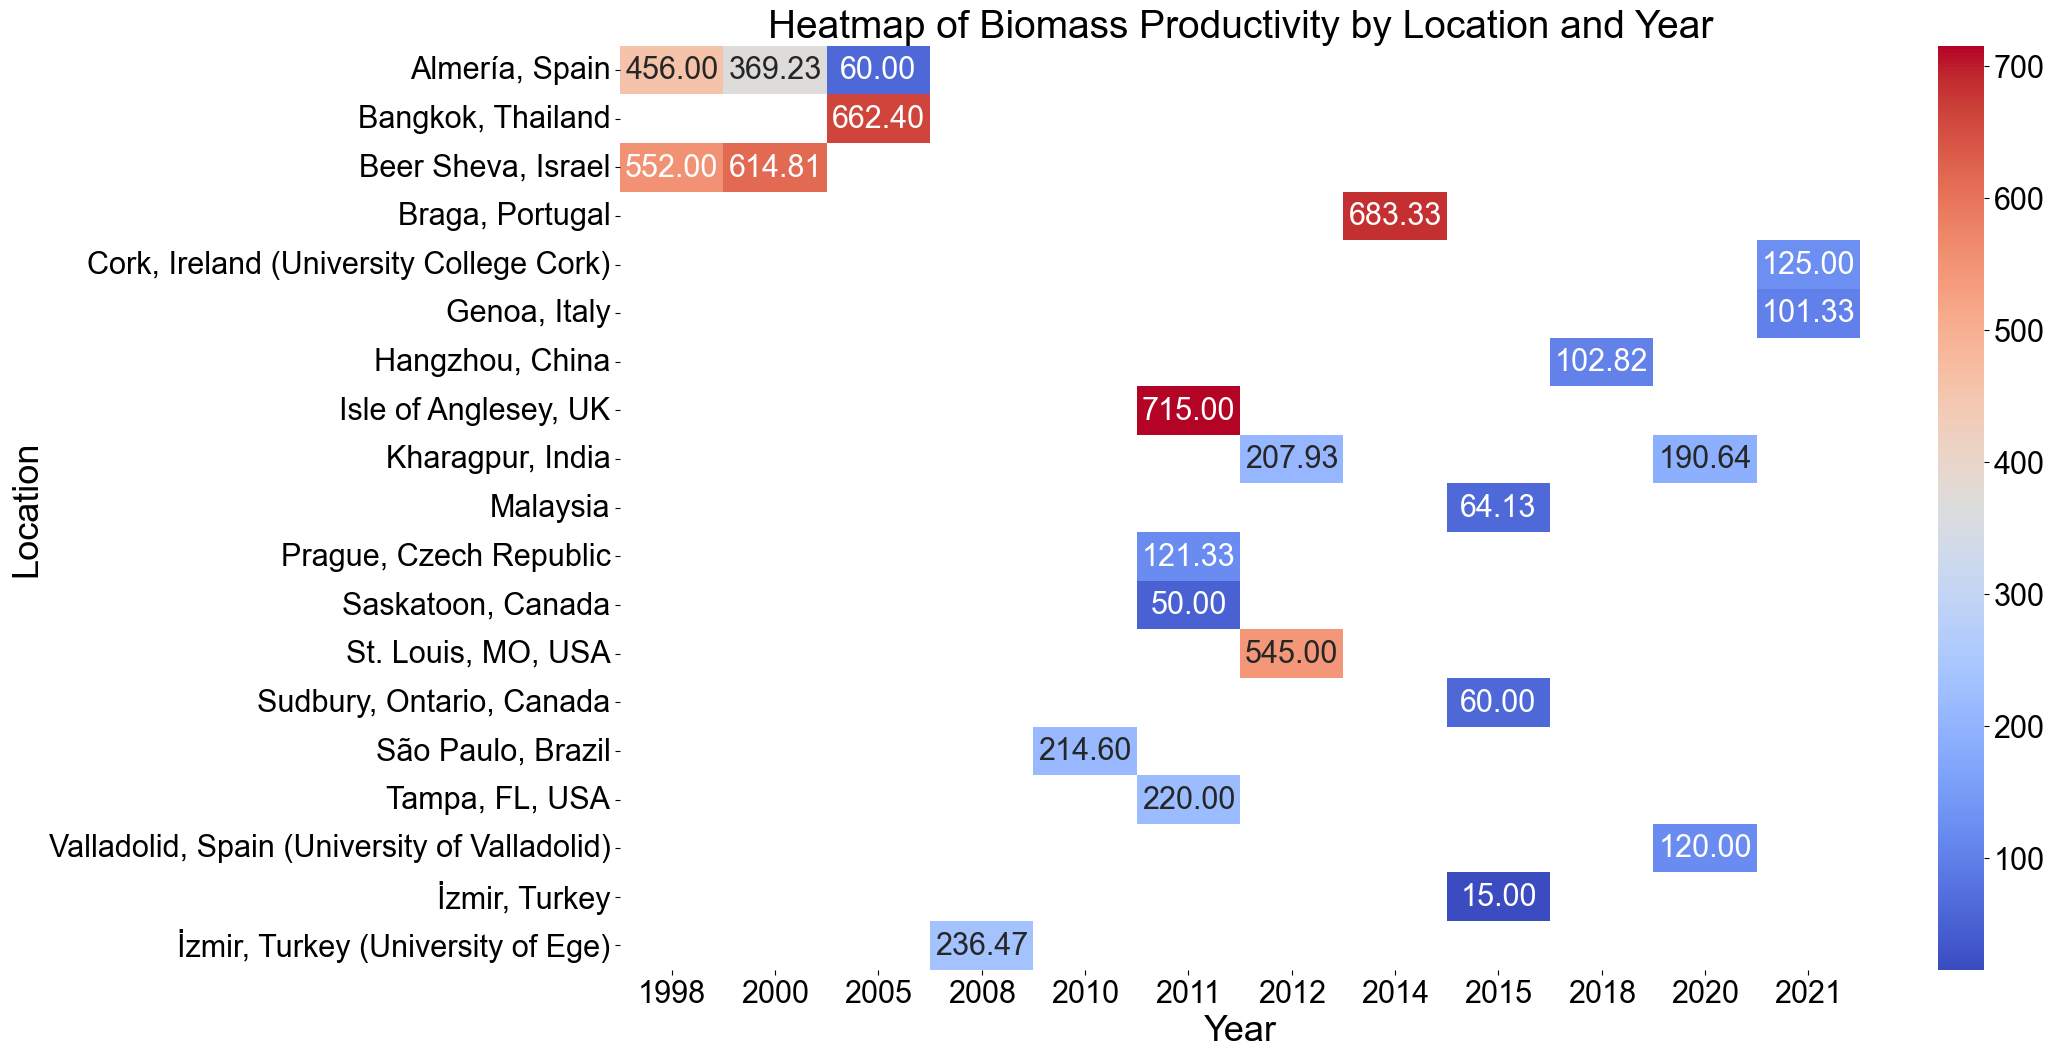

In [80]:

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

pivot_df = df.pivot_table(values='Biomass Productivity (mg/L*day)', index='Location', columns='Year', aggfunc='mean')
pivot_df.columns = pivot_df.columns.astype(int)

plt.figure(figsize=(20, 12))
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Biomass Productivity by Location and Year', fontsize=28)
plt.xlabel('Year', fontsize=26)
plt.ylabel('Location', fontsize=26)
plt.savefig('biomass_productivity_heatmap.png', dpi=400, bbox_inches='tight')
plt.show()

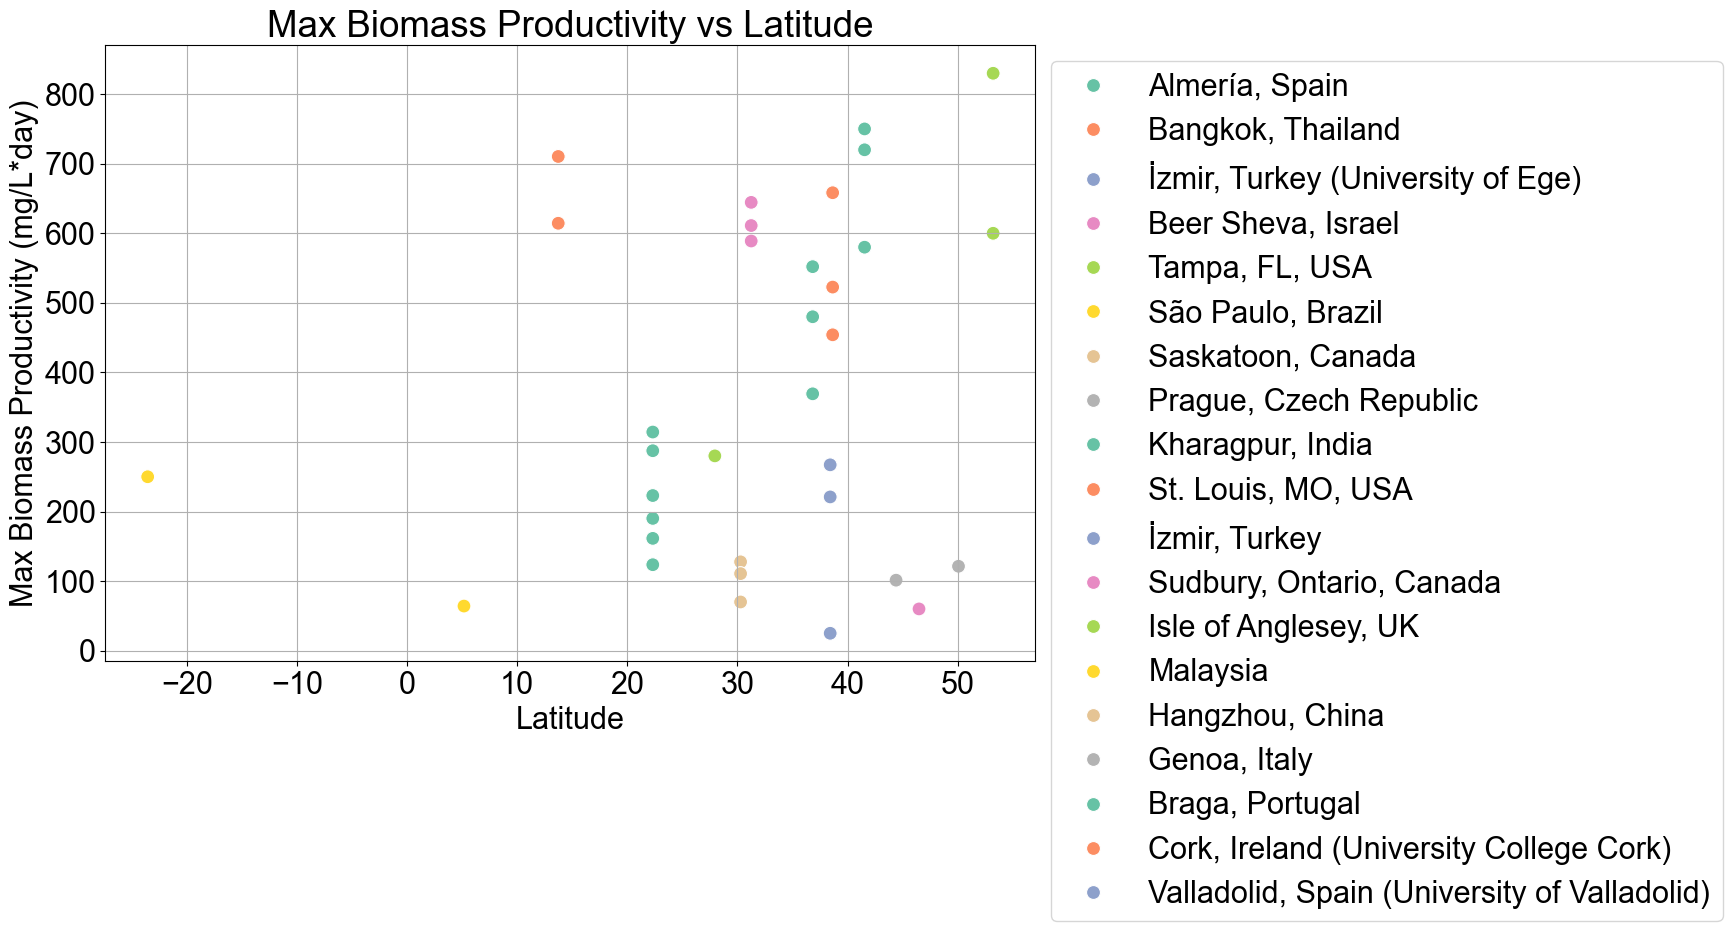

In [81]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Latitude', y='Max Biomass Productivity (mg/L*day)', hue='Location', data=df, palette='Set2', s=100)
plt.title('Max Biomass Productivity vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Biomass Productivity (mg/L*day)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

In [82]:
def categorize_species(species):
    species = str(species)
    species = species.lower()
    if 'spirulina' in species or 'arthrospira' in species:
        return 'Cyanobacteria'
    elif 'phaeodactylum' in species or 'chaetoceros' in species or 'cylindrotheca' in species:
        return 'Diatoms'
    elif 'chlorella' in species or 'scenedesmus' in species or 'neochloris' in species or 'dunaliella' in species or 'tetraselmis' in species:
        return 'Green Algae'
    elif 'porphyridium' in species:
        return 'Red Algae'
    elif 'botryococcus' in species or 'haematococcus' in species or 'nannochloropsis' in species or 'vischeria' in species or 'tisochrysis' in species:
        return 'Other Algae'
    elif 'consortium' in species:
        return 'Consortium'
    else:
        return 'Unclassified'

df['Class'] = df['Microalgae Species'].apply(categorize_species)
print(df['Class'])

0         Red Algae
1           Diatoms
2           Diatoms
3           Diatoms
4           Diatoms
5     Cyanobacteria
6     Cyanobacteria
7         Red Algae
8         Red Algae
9         Red Algae
10    Cyanobacteria
11    Cyanobacteria
12      Green Algae
13      Other Algae
14      Green Algae
15      Green Algae
16        Red Algae
17        Red Algae
18        Red Algae
19          Diatoms
20      Green Algae
21        Red Algae
22      Other Algae
23      Green Algae
24      Green Algae
25      Green Algae
26      Green Algae
27      Green Algae
28      Green Algae
29      Green Algae
30      Green Algae
31      Green Algae
32      Green Algae
33      Green Algae
34      Green Algae
35      Green Algae
36      Green Algae
37    Cyanobacteria
38       Consortium
Name: Class, dtype: object


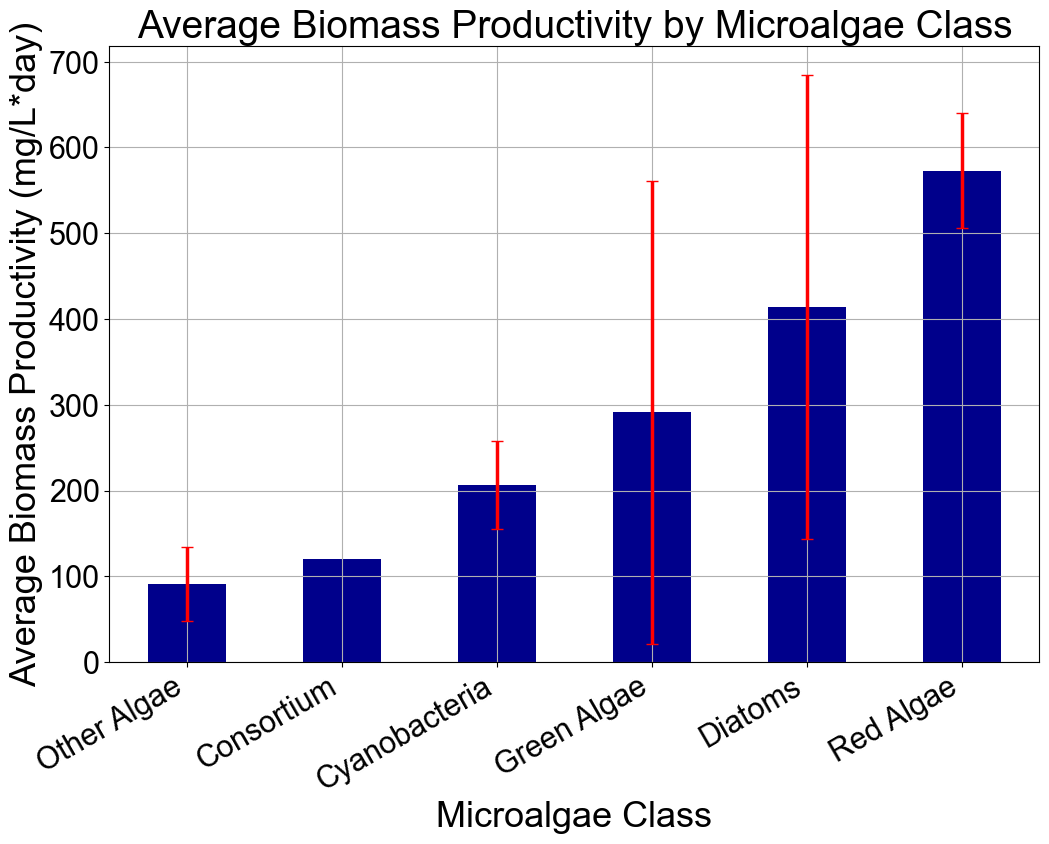

In [83]:
class_productivity_mean = df.groupby('Class')['Biomass Productivity (mg/L*day)'].mean().sort_values()
class_productivity_std = df.groupby('Class')['Biomass Productivity (mg/L*day)'].std().sort_values()

plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 22

plt.figure(figsize=(12, 8))
class_productivity_mean.plot(kind='bar', yerr=class_productivity_std, 
                             color='darkblue', capsize=4, error_kw=dict(ecolor='red', lw=2.5))

plt.title('Average Biomass Productivity by Microalgae Class', fontsize=28)
plt.xlabel('Microalgae Class', fontsize=26)
plt.ylabel('Average Biomass Productivity (mg/L*day)', fontsize=26)
plt.xticks(rotation=30, ha='right')
plt.grid(True)
plt.savefig('Average Biomass Productivity by Microalgae Class.png', dpi=400, bbox_inches='tight')
plt.show()
